In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV


import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

## Loading data

In [2]:
df = pd.read_csv('Churn_prediction_data.csv')
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.502155,0.558140,0.2,0.000000,0.0,1,1,0.506735,1,1,0,0,1,0
1,0.478448,0.534884,0.1,0.334031,0.0,0,1,0.562709,0,0,0,1,1,0
2,0.250000,0.558140,0.8,0.636357,1.0,1,0,0.569654,1,1,0,0,1,0
3,0.674569,0.488372,0.1,0.000000,0.5,0,0,0.469120,0,1,0,0,1,0
4,1.000000,0.581395,0.2,0.500246,0.0,1,1,0.395400,0,0,0,1,1,0


In [3]:
df.shape

(9515, 14)

### Checking Balance data ?

In [4]:
df['Exited'].value_counts()

Exited
0    7646
1    1869
Name: count, dtype: int64

<AxesSubplot: xlabel='Exited', ylabel='count'>

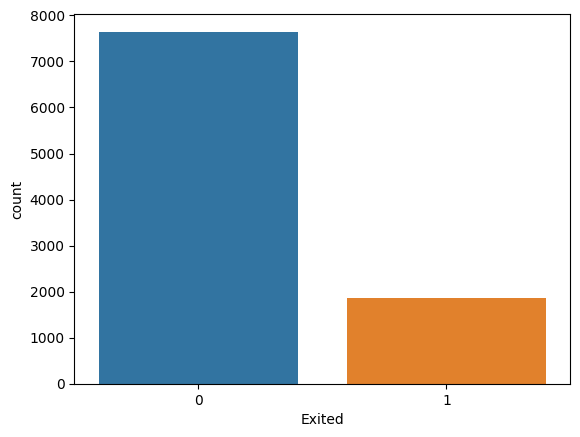

In [5]:
# seems like data is imbalace the proportion is imbalance

sns.countplot(data= df, x="Exited") 

### Balancinng data by smote technique

In [6]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [7]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, Y_sm = smote.fit_resample(X, y)

Y_sm.value_counts()

Exited
1    7646
0    7646
Name: count, dtype: int64

In [8]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_sm, Y_sm, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10704, 13)
(4588, 13)
(10704,)
(4588,)


In [9]:
len(X_train.columns)

13

In [14]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(13,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=150)

Epoch 1/150
335/335 [==============================] - 1s 1ms/step - loss: 0.6213 - accuracy: 0.6610
Epoch 2/150
335/335 [==============================] - 0s 1ms/step - loss: 0.5535 - accuracy: 0.7195
Epoch 3/150
335/335 [==============================] - 0s 1ms/step - loss: 0.5348 - accuracy: 0.7338
Epoch 4/150
335/335 [==============================] - 0s 1ms/step - loss: 0.5168 - accuracy: 0.7509
Epoch 5/150
335/335 [==============================] - 0s 1ms/step - loss: 0.4944 - accuracy: 0.7639
Epoch 6/150
335/335 [==============================] - 0s 1ms/step - loss: 0.4761 - accuracy: 0.7764
Epoch 7/150
335/335 [==============================] - 0s 1ms/step - loss: 0.4666 - accuracy: 0.7814
Epoch 8/150
335/335 [==============================] - 0s 1ms/step - loss: 0.4624 - accuracy: 0.7817
Epoch 9/150
335/335 [==============================] - 0s 1ms/step - loss: 0.4590 - accuracy: 0.7845
Epoch 10/150
335/335 [==============================] - 0s 1ms/step - loss: 0.4571 - accura

335/335 [==============================] - 0s 1ms/step - loss: 0.4063 - accuracy: 0.8082
Epoch 82/150
335/335 [==============================] - 0s 1ms/step - loss: 0.4071 - accuracy: 0.8078
Epoch 83/150
335/335 [==============================] - 0s 1ms/step - loss: 0.4058 - accuracy: 0.8075
Epoch 84/150
335/335 [==============================] - 0s 1ms/step - loss: 0.4051 - accuracy: 0.8089
Epoch 85/150
335/335 [==============================] - 0s 1ms/step - loss: 0.4072 - accuracy: 0.8078
Epoch 86/150
335/335 [==============================] - 1s 2ms/step - loss: 0.4054 - accuracy: 0.8111
Epoch 87/150
335/335 [==============================] - 1s 1ms/step - loss: 0.4064 - accuracy: 0.8103
Epoch 88/150
335/335 [==============================] - 1s 2ms/step - loss: 0.4039 - accuracy: 0.8106
Epoch 89/150
335/335 [==============================] - 1s 2ms/step - loss: 0.4056 - accuracy: 0.8111
Epoch 90/150
335/335 [==============================] - 1s 2ms/step - loss: 0.4036 - accuracy: 